<a href="https://colab.research.google.com/github/thealekhya/Image-Generation-using-GAN/blob/main/Copy_of_Yet_another_copy_of_CIFAR10_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()

filter = np.where((train_labels ==6) | (train_labels == 7) | (train_labels == 8))
train_images = train_images[filter[0]].astype('float32')
train_images = (train_images - 127.5) / 127.5


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


(15000, 32, 32, 3)
(32, 32, 3)


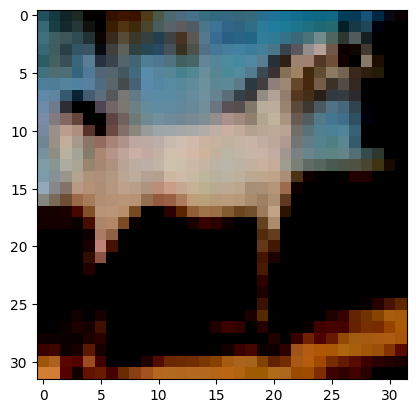

In [ ]:
print(train_images.shape)
print(train_images[0].shape)

plt.imshow(train_images[10110])
plt.show()


In [ ]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (3,3), padding='same', input_shape=(32,32,3)),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(128, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(128, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(256, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(256, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(256, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2DTranspose(512, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),


        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid'),
    ])
    return model


In [ ]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(256*4*4, input_dim=100),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((4,4,256)),

        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2D(256, (3,3), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),

        layers.Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'),
        layers.LeakyReLU(alpha=0.2),



        layers.Dense(3,activation='tanh')
    ])
    return model


In [ ]:
generator = build_generator()
discriminator = build_discriminator()
generator.summary()
discriminator.summary()
generator=tf.keras.models.load_model('generator_cifar10_1350epochs.keras')
discriminator=tf.keras.models.load_model('discriminator_cifar10_1350epochs.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 256)    │     1,048,832 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32, 32, 3)      │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,807,427 (10.71 MB)

 Trainable params: 2,807,427 (10.71 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 1, 1, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 2, 2, 512)      │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,798,273 (14.49 MB)

 Trainable params: 3,798,273 (14.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + \
                    cross_entropy(tf.zeros_like(fake_output), fake_output)

    gradients_of_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_gen, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_disc, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_images(epoch):
    predictions = generator(tf.random.normal([16, 100]), training=False)
    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i] * 127.5 + 127.5).numpy().astype('uint8'))
        plt.axis('off')
    plt.show()
    plt.close()


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


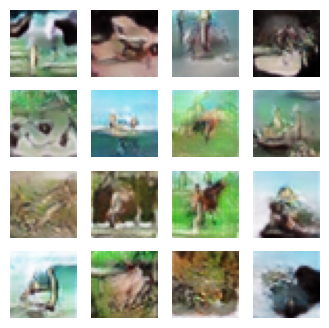

Epoch 1351 | Gen loss: 1.1219 | Disc loss: 0.9302
Epoch 1352 | Gen loss: 1.6619 | Disc loss: 0.8224
Epoch 1353 | Gen loss: 1.0634 | Disc loss: 1.0842
Epoch 1354 | Gen loss: 1.1869 | Disc loss: 1.0958
Epoch 1355 | Gen loss: 1.0353 | Disc loss: 1.1639
Epoch 1356 | Gen loss: 1.1334 | Disc loss: 1.2538
Epoch 1357 | Gen loss: 1.2168 | Disc loss: 1.3638
Epoch 1358 | Gen loss: 2.0552 | Disc loss: 0.7742
Epoch 1359 | Gen loss: 1.5994 | Disc loss: 0.8422
Epoch 1360 | Gen loss: 1.1114 | Disc loss: 1.0744


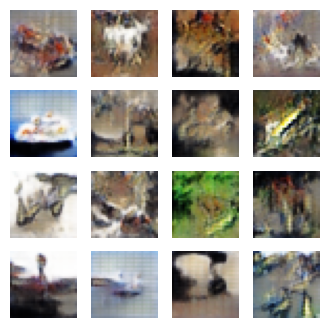

Epoch 1361 | Gen loss: 2.0803 | Disc loss: 1.1688
Epoch 1362 | Gen loss: 1.2117 | Disc loss: 1.1597
Epoch 1363 | Gen loss: 1.6401 | Disc loss: 0.8391
Epoch 1364 | Gen loss: 1.4179 | Disc loss: 0.9655
Epoch 1365 | Gen loss: 1.1060 | Disc loss: 1.1505
Epoch 1366 | Gen loss: 1.1931 | Disc loss: 0.9669
Epoch 1367 | Gen loss: 1.5949 | Disc loss: 0.9706
Epoch 1368 | Gen loss: 1.3042 | Disc loss: 1.0916
Epoch 1369 | Gen loss: 1.5058 | Disc loss: 1.0524
Epoch 1370 | Gen loss: 1.3420 | Disc loss: 0.8964


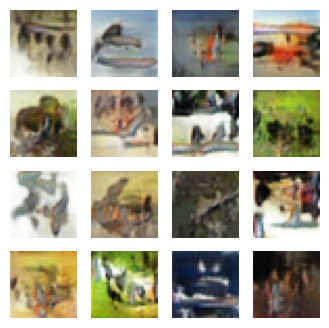

Epoch 1371 | Gen loss: 1.2717 | Disc loss: 1.1206
Epoch 1372 | Gen loss: 1.2712 | Disc loss: 0.8462
Epoch 1373 | Gen loss: 1.7093 | Disc loss: 0.7429
Epoch 1374 | Gen loss: 1.3571 | Disc loss: 1.0825
Epoch 1375 | Gen loss: 1.1656 | Disc loss: 1.0533
Epoch 1376 | Gen loss: 1.5163 | Disc loss: 0.9382
Epoch 1377 | Gen loss: 1.5001 | Disc loss: 0.9511
Epoch 1378 | Gen loss: 1.3578 | Disc loss: 0.8677
Epoch 1379 | Gen loss: 0.9856 | Disc loss: 1.1123
Epoch 1380 | Gen loss: 1.2908 | Disc loss: 1.0064


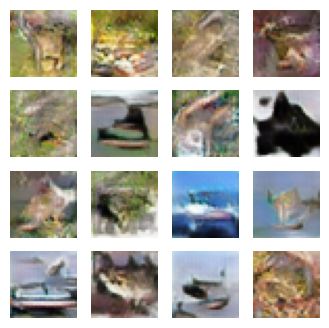

Epoch 1381 | Gen loss: 1.1301 | Disc loss: 1.1429
Epoch 1382 | Gen loss: 1.1939 | Disc loss: 1.1513
Epoch 1383 | Gen loss: 0.9552 | Disc loss: 1.1142
Epoch 1384 | Gen loss: 1.3799 | Disc loss: 1.0339
Epoch 1385 | Gen loss: 1.3062 | Disc loss: 1.1245
Epoch 1386 | Gen loss: 1.5347 | Disc loss: 0.9026
Epoch 1387 | Gen loss: 1.5852 | Disc loss: 0.8863
Epoch 1388 | Gen loss: 1.4013 | Disc loss: 0.8289
Epoch 1389 | Gen loss: 0.9875 | Disc loss: 1.2522
Epoch 1390 | Gen loss: 2.1980 | Disc loss: 0.5330


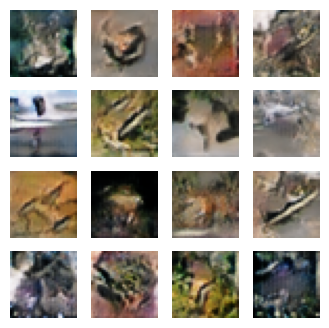

Epoch 1391 | Gen loss: 1.4796 | Disc loss: 1.0653
Epoch 1392 | Gen loss: 1.0657 | Disc loss: 1.1166
Epoch 1393 | Gen loss: 1.1528 | Disc loss: 0.9949
Epoch 1394 | Gen loss: 1.4205 | Disc loss: 1.0309
Epoch 1395 | Gen loss: 1.4610 | Disc loss: 0.9287
Epoch 1396 | Gen loss: 1.4097 | Disc loss: 1.0457
Epoch 1397 | Gen loss: 1.3954 | Disc loss: 0.8696
Epoch 1398 | Gen loss: 1.4342 | Disc loss: 0.9935
Epoch 1399 | Gen loss: 1.1954 | Disc loss: 1.0036
Epoch 1400 | Gen loss: 1.3764 | Disc loss: 0.9007


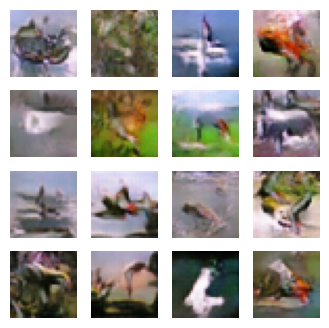

Epoch 1401 | Gen loss: 1.1365 | Disc loss: 0.9034
Epoch 1402 | Gen loss: 1.0743 | Disc loss: 1.0082
Epoch 1403 | Gen loss: 1.1736 | Disc loss: 0.9599
Epoch 1404 | Gen loss: 1.4994 | Disc loss: 0.9311
Epoch 1405 | Gen loss: 1.3758 | Disc loss: 0.9146
Epoch 1406 | Gen loss: 1.2863 | Disc loss: 0.8234
Epoch 1407 | Gen loss: 1.2136 | Disc loss: 1.1129
Epoch 1408 | Gen loss: 1.4562 | Disc loss: 0.9074
Epoch 1409 | Gen loss: 1.4080 | Disc loss: 1.0327
Epoch 1410 | Gen loss: 0.9913 | Disc loss: 1.0914


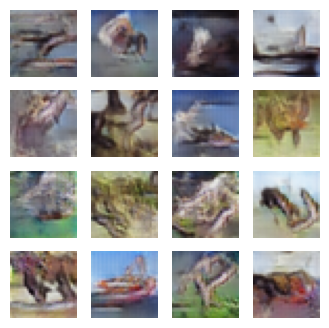

Epoch 1411 | Gen loss: 1.6212 | Disc loss: 1.2230
Epoch 1412 | Gen loss: 1.1036 | Disc loss: 1.0004
Epoch 1413 | Gen loss: 1.0207 | Disc loss: 1.0912
Epoch 1414 | Gen loss: 1.1083 | Disc loss: 1.1118
Epoch 1415 | Gen loss: 1.3278 | Disc loss: 0.9003
Epoch 1416 | Gen loss: 1.2485 | Disc loss: 0.9418
Epoch 1417 | Gen loss: 1.1601 | Disc loss: 1.1864
Epoch 1418 | Gen loss: 1.3265 | Disc loss: 1.0664
Epoch 1419 | Gen loss: 1.7232 | Disc loss: 0.8545
Epoch 1420 | Gen loss: 1.1854 | Disc loss: 1.1177


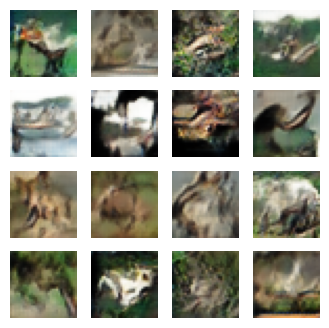

Epoch 1421 | Gen loss: 2.0968 | Disc loss: 1.0784
Epoch 1422 | Gen loss: 1.2468 | Disc loss: 1.2436
Epoch 1423 | Gen loss: 1.4885 | Disc loss: 1.0733
Epoch 1424 | Gen loss: 1.3099 | Disc loss: 0.8423
Epoch 1425 | Gen loss: 1.3981 | Disc loss: 0.9191
Epoch 1426 | Gen loss: 1.2387 | Disc loss: 1.1863
Epoch 1427 | Gen loss: 1.3289 | Disc loss: 1.0690
Epoch 1428 | Gen loss: 1.5001 | Disc loss: 0.9416
Epoch 1429 | Gen loss: 1.2434 | Disc loss: 0.9939
Epoch 1430 | Gen loss: 1.6850 | Disc loss: 0.7515


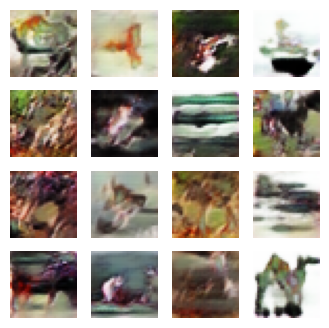

Epoch 1431 | Gen loss: 1.1359 | Disc loss: 0.9273
Epoch 1432 | Gen loss: 1.2780 | Disc loss: 0.9702
Epoch 1433 | Gen loss: 1.0762 | Disc loss: 0.9889
Epoch 1434 | Gen loss: 1.3020 | Disc loss: 1.0633
Epoch 1435 | Gen loss: 1.6861 | Disc loss: 0.8453
Epoch 1436 | Gen loss: 1.4687 | Disc loss: 1.0352
Epoch 1437 | Gen loss: 1.9132 | Disc loss: 0.8797
Epoch 1438 | Gen loss: 1.1214 | Disc loss: 1.1437
Epoch 1439 | Gen loss: 1.5067 | Disc loss: 0.9002
Epoch 1440 | Gen loss: 1.5321 | Disc loss: 0.8476


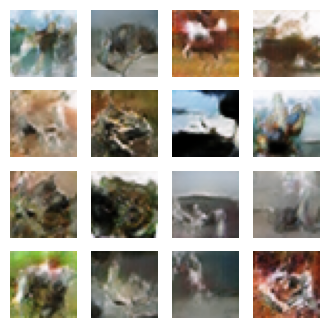

Epoch 1441 | Gen loss: 1.1575 | Disc loss: 1.0209
Epoch 1442 | Gen loss: 1.8682 | Disc loss: 0.8245
Epoch 1443 | Gen loss: 0.9907 | Disc loss: 1.1262
Epoch 1444 | Gen loss: 1.4010 | Disc loss: 0.8425
Epoch 1445 | Gen loss: 0.9766 | Disc loss: 1.5342
Epoch 1446 | Gen loss: 1.4141 | Disc loss: 0.9224
Epoch 1447 | Gen loss: 0.9326 | Disc loss: 1.1618
Epoch 1448 | Gen loss: 1.3026 | Disc loss: 1.1997
Epoch 1449 | Gen loss: 1.3205 | Disc loss: 0.9122
Epoch 1450 | Gen loss: 1.2340 | Disc loss: 1.0117


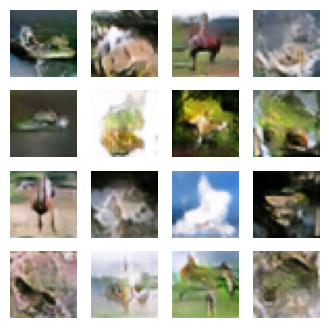

Epoch 1451 | Gen loss: 1.3672 | Disc loss: 0.9867
Epoch 1452 | Gen loss: 1.3502 | Disc loss: 0.9063
Epoch 1453 | Gen loss: 1.1214 | Disc loss: 0.9620
Epoch 1454 | Gen loss: 1.3684 | Disc loss: 0.9173
Epoch 1455 | Gen loss: 1.2225 | Disc loss: 1.1987
Epoch 1456 | Gen loss: 1.0935 | Disc loss: 1.0926
Epoch 1457 | Gen loss: 1.3464 | Disc loss: 1.0483
Epoch 1458 | Gen loss: 1.7859 | Disc loss: 0.6800
Epoch 1459 | Gen loss: 1.4589 | Disc loss: 0.7414
Epoch 1460 | Gen loss: 1.4949 | Disc loss: 0.9005


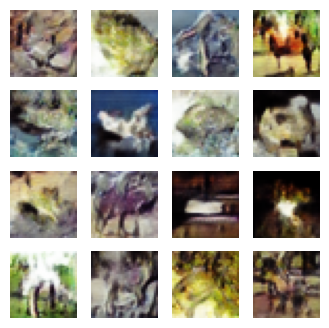

Epoch 1461 | Gen loss: 1.8360 | Disc loss: 0.9670
Epoch 1462 | Gen loss: 1.8751 | Disc loss: 0.7537
Epoch 1463 | Gen loss: 1.6624 | Disc loss: 0.8257
Epoch 1464 | Gen loss: 1.2178 | Disc loss: 0.9234
Epoch 1465 | Gen loss: 1.1128 | Disc loss: 1.2118
Epoch 1466 | Gen loss: 1.4293 | Disc loss: 1.0494
Epoch 1467 | Gen loss: 1.3403 | Disc loss: 0.9538
Epoch 1468 | Gen loss: 1.3743 | Disc loss: 1.0002
Epoch 1469 | Gen loss: 1.7953 | Disc loss: 0.9661
Epoch 1470 | Gen loss: 1.5253 | Disc loss: 0.7629


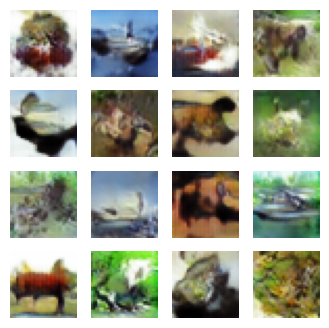

Epoch 1471 | Gen loss: 1.1528 | Disc loss: 1.0901
Epoch 1472 | Gen loss: 1.4945 | Disc loss: 0.9128
Epoch 1473 | Gen loss: 1.0963 | Disc loss: 1.0910
Epoch 1474 | Gen loss: 1.2664 | Disc loss: 0.9415
Epoch 1475 | Gen loss: 1.5504 | Disc loss: 0.7987
Epoch 1476 | Gen loss: 1.4012 | Disc loss: 0.9037
Epoch 1477 | Gen loss: 1.2870 | Disc loss: 0.9906
Epoch 1478 | Gen loss: 1.0834 | Disc loss: 1.1107
Epoch 1479 | Gen loss: 1.3551 | Disc loss: 1.0005
Epoch 1480 | Gen loss: 1.6030 | Disc loss: 0.9462


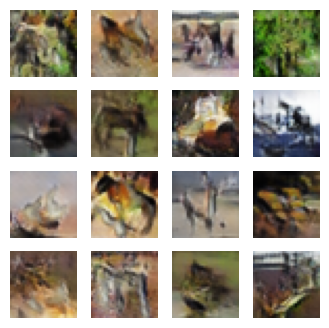

Epoch 1481 | Gen loss: 1.4391 | Disc loss: 0.8645
Epoch 1482 | Gen loss: 1.5536 | Disc loss: 0.8816
Epoch 1483 | Gen loss: 1.2155 | Disc loss: 1.0404
Epoch 1484 | Gen loss: 1.5107 | Disc loss: 0.7556
Epoch 1485 | Gen loss: 1.0733 | Disc loss: 1.0097
Epoch 1486 | Gen loss: 1.6127 | Disc loss: 0.8193
Epoch 1487 | Gen loss: 1.4876 | Disc loss: 0.9999
Epoch 1488 | Gen loss: 1.5899 | Disc loss: 0.8568
Epoch 1489 | Gen loss: 1.4500 | Disc loss: 0.9737
Epoch 1490 | Gen loss: 1.2692 | Disc loss: 1.0609


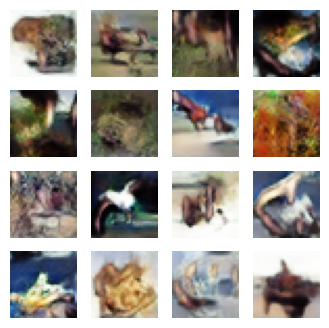

Epoch 1491 | Gen loss: 1.6977 | Disc loss: 0.8578
Epoch 1492 | Gen loss: 1.6037 | Disc loss: 0.7660
Epoch 1493 | Gen loss: 1.2436 | Disc loss: 0.9138
Epoch 1494 | Gen loss: 1.1030 | Disc loss: 1.1811
Epoch 1495 | Gen loss: 1.5036 | Disc loss: 0.8617
Epoch 1496 | Gen loss: 1.2258 | Disc loss: 1.0313
Epoch 1497 | Gen loss: 1.3455 | Disc loss: 1.0659
Epoch 1498 | Gen loss: 1.2218 | Disc loss: 0.8976
Epoch 1499 | Gen loss: 1.2460 | Disc loss: 0.9275
Epoch 1500 | Gen loss: 1.4619 | Disc loss: 1.0029


In [ ]:
EPOCHS = 1500
BATCH_SIZE = 256
START_EPOCH=1350

train_dataset = tf.data.Dataset.from_tensor_slices(train_images) \
    .shuffle(6000).batch(BATCH_SIZE)

for epoch in range(START_EPOCH,EPOCHS):
    for image_batch in train_dataset:
        gen_loss, disc_loss = train_step(image_batch)
    if(epoch%10==0):
      generate_images(epoch)
    if epoch%50==0:
      generator.save(f'generator_cifar10_{epoch}epochs.keras')
      discriminator.save(f'discriminator_cifar10_{epoch}epochs.keras')
    print(f'Epoch {epoch+1} | Gen loss: {gen_loss:.4f} | Disc loss: {disc_loss:.4f}')


In [ ]:
generator.save('generator_cifar10_1200epochs.keras')
discriminator.save('discriminator_cifar10_1200epochs.keras')